In [6]:
# Install a Drive FUSE wrapper: https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .../0

Setting up unattended-upgrades (0.98ubuntu1.1) ...

Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up dirmngr (2.1.15-1ubuntu8) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd64 (0.108-2) ...
Setting up python3-gi (3.24.1-2build1) ...
Setting up module-init-tools (24-1ubuntu2) ...
Setting up python3-software-properties (0.96.24.17)

In [0]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

In [8]:
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [9]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

print('Files in Drive:')
!ls drive/

Files in Drive:
architecture.json
cathedral_ward_map.jpg
classification of outcomes.odt
Code
Colab Notebooks
Demo
Drafts
hdf5.odt
healing_church_and_abandoned_old_workshop_map.jpg
Hemwick_charnel_lane_map.jpg
Home Coming Days
images
inception training.PNG
MI Career.odt
modelbaseline.json
Network.structuredefinition.xml
Progress Report.docx.odt
resourcemodel.docx
Results.ods
Samenvattingen
Search table.ods
self made.PNG
testing performance time.odt
Transfer learning.odt
Voorbeelden


In [10]:
#Test list directory
!ls drive/Colab\ Notebooks

bcancerdata.csv		      logs
BCancer.ipynb		      makesample.py
imlabel_test.npy	      Retinopathy
immatrix_test.npy	      retinopathy_inception.h5
inception_imlabel_small.npy   retinopathy_inception_weights.h5
inception_imlabel_test.npy    retinopathy_model.h5
inception_imlabel_val.npy     retinopathy_vggnet16.h5
inception_immatrix_small.npy  test_labels.csv
inception_immatrix_test.npy   train_labels.csv
inception_immatrix_val.npy    val_labels.csv
labels.csv


In [25]:
import pandas as pd

data = pd.read_csv("drive/Colab Notebooks/bcancerdata.csv",header = 0)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import TensorBoard

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [28]:
!pip install pandas_profiling
import pandas_profiling

In [29]:
pandas_profiling.ProfileReport(data)

Number of variables,33
Number of observations,569
Total Missing (%),3.0%
Total size in memory,146.8 KiB
Average record size in memory,264.1 B
Numeric,21
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,11


In [0]:
# Column Unnamed : 32 holds only null values, so it is of no use to us. We simply drop that column.
data.drop("Unnamed: 32",axis=1,inplace=True)
data.drop("id", axis=1, inplace=True)

In [0]:
# Select the columns to use for prediction in the neural network
prediction_var = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
X = data[prediction_var].values
Y = data.diagnosis.values

In [0]:
# Diagnosis values are strings. Changing them into numerical values using LabelEncoder.
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [0]:
#Cross validate
X_train, X_test, y_train, y_test = train_test_split(X[:285], encoded_Y[:285], test_size=0.1, shuffle=True, random_state=2018) 

In [34]:
X_train.shape

(256, 30)

In [35]:
X_test.shape

(29, 30)

In [0]:
model = Sequential()

# Visualisation
tbCallBack = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)
tbCallBack.set_model(model)

#Input layer
model.add(Dense(256, input_dim=30, activation='tanh'))

#Hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))

#Output layer
model.add(Dense(1, activation='sigmoid'))

#compile model
model.compile(loss='poisson', optimizer='rmsprop', 
              metrics=['accuracy'])

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               7936      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 32,833
Trainable params: 32,833
Non-trainable params: 0
_________________________________________________________________


In [0]:
#save in var for visualisation
best_weights = 'bcancer_detection_weights.h5'
checkpoint = ModelCheckpoint(best_weights, 
                             monitor='val_acc', 
                             verbose=1, 
                             mode='max', 
                             save_best_only=True)
callbacks_list = [checkpoint]

tensorboard = TensorBoard(log_dir='drive/Colab Notebooks/logs')

In [39]:
%%time
vis = model.fit(X_train, y_train, 
                validation_data=(X_test, y_test),
                epochs=100, batch_size=16, verbose=1, callbacks=[tensorboard])

Train on 256 samples, validate on 29 samples
Epoch 1/100
256/256 [==============================] - 0s 1ms/step - loss: 0.7215 - acc: 0.8125 - val_loss: 0.7011 - val_acc: 0.7931
Epoch 2/100
256/256 [==============================] - 0s 401us/step - loss: 0.6641 - acc: 0.8828 - val_loss: 0.6782 - val_acc: 0.8621
Epoch 3/100
256/256 [==============================] - 0s 385us/step - loss: 0.6426 - acc: 0.8984 - val_loss: 0.6473 - val_acc: 0.8966
Epoch 4/100
256/256 [==============================] - 0s 408us/step - loss: 0.6620 - acc: 0.8984 - val_loss: 0.7092 - val_acc: 0.7931
Epoch 5/100
256/256 [==============================] - 0s 375us/step - loss: 0.6348 - acc: 0.9102 - val_loss: 0.6430 - val_acc: 0.8966
Epoch 6/100
256/256 [==============================] - 0s 390us/step - loss: 0.6516 - acc: 0.8984 - val_loss: 0.5998 - val_acc: 0.8966
Epoch 7/100
256/256 [==============================] - 0s 420us/step - loss: 0.6496 - acc: 0.9141 - val_loss: 0.6035 - val_acc: 0.8966
Epoch 8/100


Epoch 21/100
256/256 [==============================] - 0s 396us/step - loss: 0.6404 - acc: 0.9102 - val_loss: 0.6401 - val_acc: 0.8966
Epoch 22/100
256/256 [==============================] - 0s 483us/step - loss: 0.6120 - acc: 0.9141 - val_loss: 0.7918 - val_acc: 0.8621
Epoch 23/100
256/256 [==============================] - 0s 434us/step - loss: 0.6082 - acc: 0.9375 - val_loss: 0.7387 - val_acc: 0.8621
Epoch 24/100
256/256 [==============================] - 0s 410us/step - loss: 0.6352 - acc: 0.9141 - val_loss: 0.6559 - val_acc: 0.8276
Epoch 25/100
256/256 [==============================] - 0s 430us/step - loss: 0.6460 - acc: 0.8906 - val_loss: 0.6621 - val_acc: 0.8621
Epoch 26/100
256/256 [==============================] - 0s 441us/step - loss: 0.6071 - acc: 0.9180 - val_loss: 0.7083 - val_acc: 0.8621
Epoch 27/100
256/256 [==============================] - 0s 453us/step - loss: 0.6163 - acc: 0.9219 - val_loss: 0.6216 - val_acc: 0.8621
Epoch 28/100
256/256 [==========================

Epoch 42/100
256/256 [==============================] - 0s 455us/step - loss: 0.6112 - acc: 0.9336 - val_loss: 0.6561 - val_acc: 0.7931
Epoch 43/100
256/256 [==============================] - 0s 435us/step - loss: 0.6165 - acc: 0.9258 - val_loss: 0.6721 - val_acc: 0.7931
Epoch 44/100
256/256 [==============================] - 0s 445us/step - loss: 0.6106 - acc: 0.9414 - val_loss: 0.6561 - val_acc: 0.8966
Epoch 45/100
256/256 [==============================] - 0s 413us/step - loss: 0.6224 - acc: 0.9219 - val_loss: 0.5805 - val_acc: 0.9310
Epoch 46/100
256/256 [==============================] - 0s 449us/step - loss: 0.6256 - acc: 0.9297 - val_loss: 0.6648 - val_acc: 0.8276
Epoch 47/100
256/256 [==============================] - 0s 450us/step - loss: 0.6131 - acc: 0.9180 - val_loss: 0.6127 - val_acc: 0.8966
Epoch 48/100
256/256 [==============================] - 0s 443us/step - loss: 0.6091 - acc: 0.9258 - val_loss: 0.6051 - val_acc: 0.9310
Epoch 49/100
256/256 [==========================

Epoch 63/100
256/256 [==============================] - 0s 437us/step - loss: 0.6231 - acc: 0.9258 - val_loss: 0.5902 - val_acc: 0.8966
Epoch 64/100
256/256 [==============================] - 0s 428us/step - loss: 0.6162 - acc: 0.9219 - val_loss: 0.6109 - val_acc: 0.8966
Epoch 65/100
256/256 [==============================] - 0s 436us/step - loss: 0.6173 - acc: 0.9258 - val_loss: 0.6287 - val_acc: 0.8276
Epoch 66/100
256/256 [==============================] - 0s 418us/step - loss: 0.6163 - acc: 0.9297 - val_loss: 0.6211 - val_acc: 0.8966
Epoch 67/100
256/256 [==============================] - 0s 485us/step - loss: 0.6003 - acc: 0.9336 - val_loss: 0.6421 - val_acc: 0.8276
Epoch 68/100
256/256 [==============================] - 0s 427us/step - loss: 0.6104 - acc: 0.9375 - val_loss: 0.6062 - val_acc: 0.8966
Epoch 69/100
256/256 [==============================] - 0s 425us/step - loss: 0.6094 - acc: 0.9141 - val_loss: 0.5976 - val_acc: 0.9310
Epoch 70/100
256/256 [==========================

Epoch 84/100
256/256 [==============================] - 0s 433us/step - loss: 0.6112 - acc: 0.9297 - val_loss: 0.6279 - val_acc: 0.8621
Epoch 85/100
256/256 [==============================] - 0s 451us/step - loss: 0.6090 - acc: 0.9297 - val_loss: 0.6101 - val_acc: 0.8621
Epoch 86/100
256/256 [==============================] - 0s 403us/step - loss: 0.6152 - acc: 0.9219 - val_loss: 0.5826 - val_acc: 0.9310
Epoch 87/100
256/256 [==============================] - 0s 471us/step - loss: 0.6058 - acc: 0.9453 - val_loss: 0.6392 - val_acc: 0.8966
Epoch 88/100
256/256 [==============================] - 0s 424us/step - loss: 0.5995 - acc: 0.9375 - val_loss: 0.5959 - val_acc: 0.8966
Epoch 89/100
256/256 [==============================] - 0s 410us/step - loss: 0.6193 - acc: 0.9141 - val_loss: 0.6158 - val_acc: 0.8966
Epoch 90/100
256/256 [==============================] - 0s 424us/step - loss: 0.6085 - acc: 0.9141 - val_loss: 0.6085 - val_acc: 0.8966
Epoch 91/100
256/256 [==========================

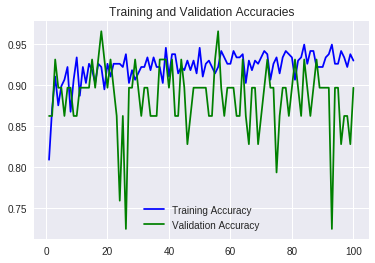

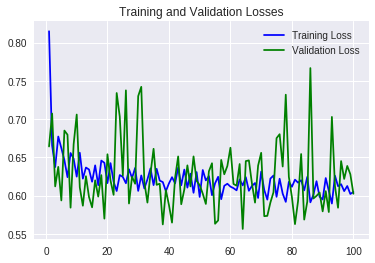

In [84]:
#Plot the accuracy and losses of the model
import matplotlib.pyplot as plt
import seaborn as sns; sns.set
%matplotlib inline

acc = vis.history['acc']
val_acc = vis.history['val_acc']
loss = vis.history['loss']
val_loss = vis.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Losses')
plt.legend()

In [0]:
from keras.models import load_model
model.save('bcancer_detection.h5')

# Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.33, shuffle=True, random_state=2018) 

In [105]:
parameters = {"criterion": ["entropy", "gini"],
              "max_depth": [2, 5, 10, 15, 20, 50],
              "min_samples_split": [2, 5, 10, 15, 20, 50],
              "min_samples_leaf": [2, 5, 10, 15, 20, 50],
              "random_state": [2018],
              "max_leaf_nodes": [2, 5, 10, 15, 20, 50],
              }

dt = DecisionTreeClassifier()

clf = GridSearchCV(dt, parameters, cv=10, n_jobs=4)

clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [2, 5, 10, 15, 20, 50], 'min_samples_split': [2, 5, 10, 15, 20, 50], 'min_samples_leaf': [2, 5, 10, 15, 20, 50], 'random_state': [2018], 'max_leaf_nodes': [2, 5, 10, 15, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [106]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95       117
          1       0.94      0.89      0.91        71

avg / total       0.94      0.94      0.94       188



In [107]:
print(accuracy_score(y_test, y_pred))

0.9361702127659575


In [0]:
treemodel = DecisionTreeClassifier().fit(X_train, y_train)

In [109]:
y_pred = treemodel.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.94      0.94       117
          1       0.90      0.92      0.91        71

avg / total       0.93      0.93      0.93       188



In [110]:
print(accuracy_score(y_test, y_pred))

0.9308510638297872


In [0]:
dot_data = export_graphviz(treemodel, out_file='bcancer.dot', 
                         feature_names=prediction_var,  
                         class_names=['M', 'B'],
                         filled=True, 
                         rounded=True,  
                         special_characters=True)  

In [0]:
import graphviz 

graph = graphviz.Source(dot_data) 

In [0]:
# Using those arrays, we can parse the tree structure:

n_nodes = treemodel.tree_.node_count
children_left = treemodel.tree_.children_left
children_right = treemodel.tree_.children_right
feature = treemodel.tree_.feature
threshold = treemodel.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

In [0]:
# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = treemodel.decision_path(X_test)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = treemodel.apply(X_test)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] != node_id:
        continue

    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             X_test[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))